In [3]:
pip install pulp

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ------------ --------------------------- 5.0/16.4 MB 28.5 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.4 MB 37.0 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 35.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pulp
from pulp import LpStatus

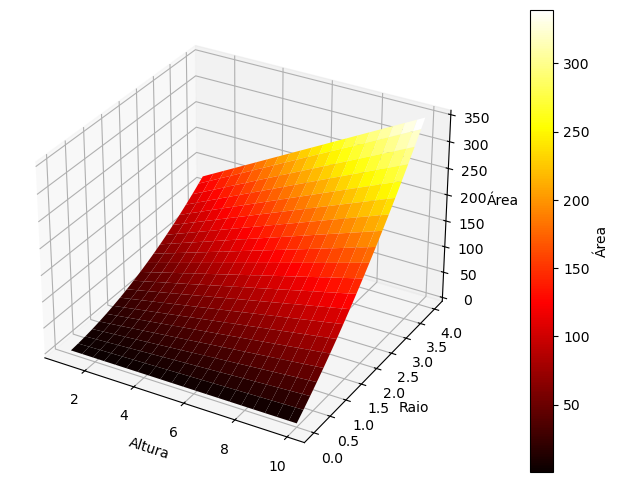

In [33]:
import numpy as np
import matplotlib.pyplot as pp

# Fixando as variaveis
vol = 50.0 #volume
a_mx = 10.0 #altura maxima

def a2r( a ): ## calculando o raio necessário para manter volume fixo dada uma altura a
    return ( vol / ( np.pi * a ) ) ** 0.5

N = 60
a = np.linspace( 1.0, a_mx, N )
r = np.linspace( 0.0, np.max( a2r( a ) ), N )
aa, rr = np.meshgrid( a, r )

def A( a, r ):
    return 2 * np.pi * r * ( r + a )

Z = A( aa, rr )

fig = pp.figure( figsize = ( 15, 6 ) )

rs = cs = 3
alpha = 1.0
cmap = pp.cm.hot

ax = fig.add_subplot( 1, 1, 1, projection = '3d' )
surf = ax.plot_surface( aa, rr, Z, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0 )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Raio' )
ax.set_zlabel( 'Área' )
pp.colorbar( surf, label = 'Área' )

pp.show()

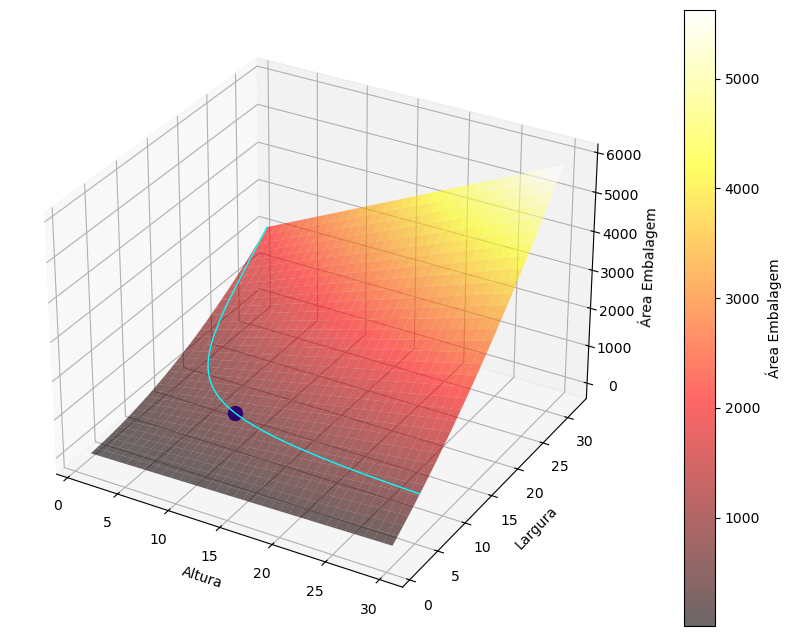

In [88]:
import numpy as np
import matplotlib.pyplot as pp

# Fixando as variaveis
volume_alvo = 1000  # volume em cm³ (1litro)
altura_maxima = 30 # altura maxima em cm

def largura_da_base( alturas ): ## calculando a largura da base para manter volume fixo dada uma altura h
    return ( volume_alvo / alturas ) ** 0.5

def area_da_embalagem( alturas, larguras ):
    return (larguras*larguras)*2 + (larguras*alturas)*4 ## (larguras*larguras)*2: área de ambas as bases // (larguras*alturas)*4: área das laterais

# Superficie Grid (3D)
N = 100
alturas = np.linspace( 1.0, altura_maxima, N )
larguras = np.linspace( 1.0, np.max( largura_da_base( alturas ) ), N )
aa, ll = np.meshgrid( alturas, larguras )

area_superficie = area_da_embalagem( aa, ll )

# Linha que satisfaz a condição de 1litro
a_linha = np.linspace(1.0, altura_maxima, 200) 
l_linha = largura_da_base(a_linha)
z_linha = area_da_embalagem(a_linha, l_linha)


# Gráfico
fig = pp.figure( figsize = ( 15, 8) )

rs = cs = 3
alpha = 0.6
cmap = pp.cm.hot

ax = fig.add_subplot( 1, 1, 1, projection = '3d' )
surf = ax.plot_surface( aa, ll, area_superficie, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0 )

# PLOT DA LINHA DE RESTRIÇÃO (1 Litro)
ax.plot(a_linha, l_linha, z_linha, color='cyan', lw=1, label='Caminho de 1 Litro', zorder=10)

# Ponto ótimo
idx_min = np.argmin(z_linha)
ax.scatter(a_linha[idx_min], l_linha[idx_min], z_linha[idx_min], color='blue', s=100, label='Configuração Ótima')

ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Largura' )
ax.set_zlabel( 'Área Embalagem' )
pp.colorbar( surf, label = 'Área Embalagem' )

pp.show()

In [86]:
a_linha[idx_min], l_linha[idx_min], z_linha[idx_min]

(np.float64(10.025125628140703),
 np.float64(9.98746081011505),
 np.float64(600.0009441773091))

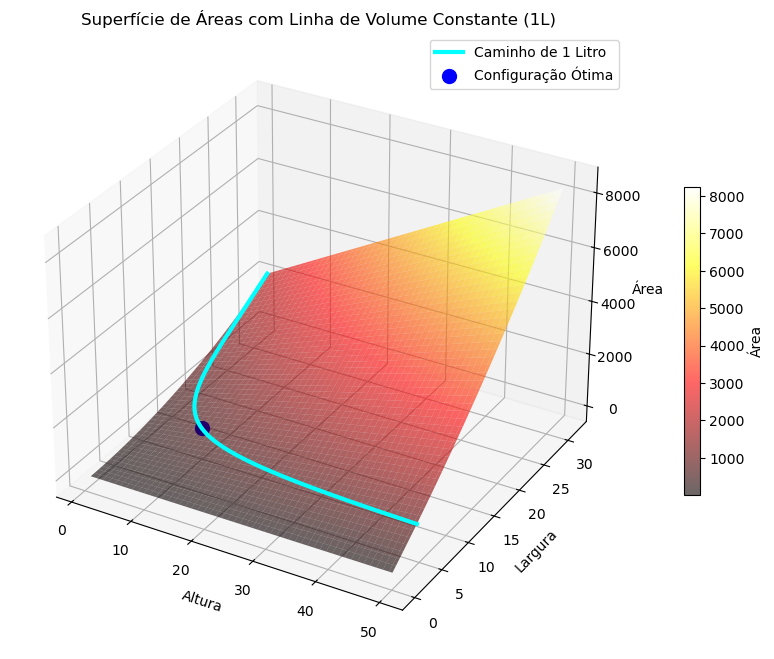

In [62]:
import numpy as np
import matplotlib.pyplot as pp

# Fixando as variaveis
volume_alvo = 1000  
altura_maxima = 50 

def largura_da_base( alturas ): 
    return ( volume_alvo / alturas ) ** 0.5

def area_da_embalagem( alturas, larguras ):
    return (larguras*larguras)*2 + (larguras*alturas)*4

# 1. Configuração da Superfície (Grid)
N = 100
alturas_lin  = np.linspace( 1.0, altura_maxima, N )
larguras_lin = np.linspace( 0.1, np.max( largura_da_base( alturas_lin ) ), N )
aa, ll = np.meshgrid( alturas_lin, larguras_lin )
A_surf = area_da_embalagem( aa, ll )

# 2. CÁLCULO DA LINHA DE 1 LITRO (Otimização)
# Para cada altura, calculamos a largura exata para ter 1L
a_linha = np.linspace(1.0, altura_maxima, 200) 
l_linha = largura_da_base(a_linha)
z_linha = area_da_embalagem(a_linha, l_linha)

# 3. Visualização
fig = pp.figure( figsize = ( 15, 8 ) )
ax = fig.add_subplot( 1, 1, 1, projection = '3d' )

# Plot da superfície (com alpha menor para enxergar a linha melhor)
surf = ax.plot_surface( aa, ll, A_surf, alpha = 0.6, cmap = pp.cm.hot, linewidth=0 )

# PLOT DA LINHA DE RESTRIÇÃO (1 Litro)
ax.plot(a_linha, l_linha, z_linha, color='cyan', lw=3, label='Caminho de 1 Litro', zorder=10)

# Opcional: Ponto de mínimo na linha
idx_min = np.argmin(z_linha)
ax.scatter(a_linha[idx_min], l_linha[idx_min], z_linha[idx_min], color='blue', s=100, label='Configuração Ótima')

ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Largura' )
ax.set_zlabel( 'Área' )
ax.set_title('Superfície de Áreas com Linha de Volume Constante (1L)')
pp.colorbar( surf, label = 'Área', shrink=0.5 )
pp.legend()

pp.show()

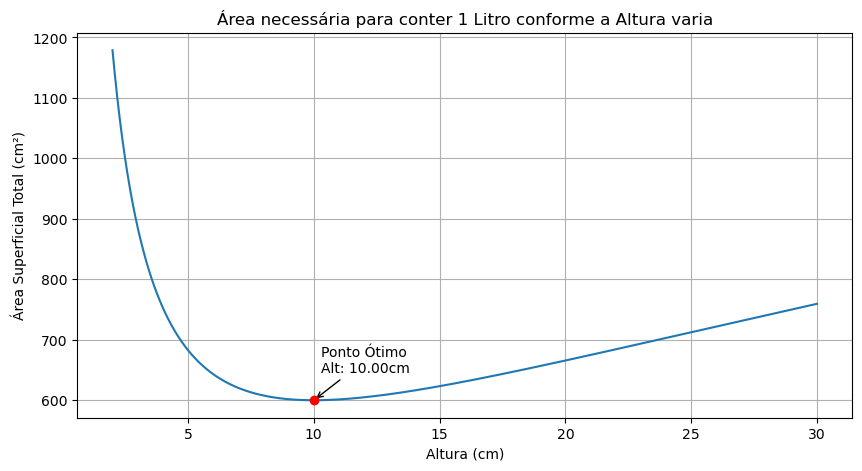

In [101]:
import numpy as np
import matplotlib.pyplot as pp

volume_alvo = 1000  # Usando 1000cm3 (1 litro) para facilitar a escala
altura_maxima = 30

# 1. Criamos um vetor de alturas
alturas = np.linspace(2.0, altura_maxima, 10000)

# 2. Calculamos a LARGURA EXATA para que cada altura resulte em 1 litro
# Volume = h * L^2  => L = sqrt(Volume / h)
larguras_obrigatorias = (volume_alvo / alturas) ** 0.5

# 3. Calculamos a ÁREA apenas para essas caixas de 1 litro
areas_reais = (larguras_obrigatorias**2)*2 + (larguras_obrigatorias * alturas)*4

# Visualização 2D (já que a largura está presa à altura para manter o volume)
pp.figure(figsize=(10, 5))
pp.plot(alturas, areas_reais, label='Área Total (para 1L)')
pp.xlabel('Altura (cm)')
pp.ylabel('Área Superficial Total (cm²)')
pp.title('Área necessária para conter 1 Litro conforme a Altura varia')

# Encontrando o ponto ideal (Mínimo)
idx_min = np.argmin(areas_reais)
pp.scatter(alturas[idx_min], areas_reais[idx_min], color='red', zorder=5)
pp.annotate(f'Ponto Ótimo\nAlt: {alturas[idx_min]:.2f}cm', 
            xy=(alturas[idx_min], areas_reais[idx_min]), xytext=(5, 20),
            textcoords='offset points', arrowprops=dict(arrowstyle='->'))

pp.grid(True)
pp.show()

# Projeto Portfólio

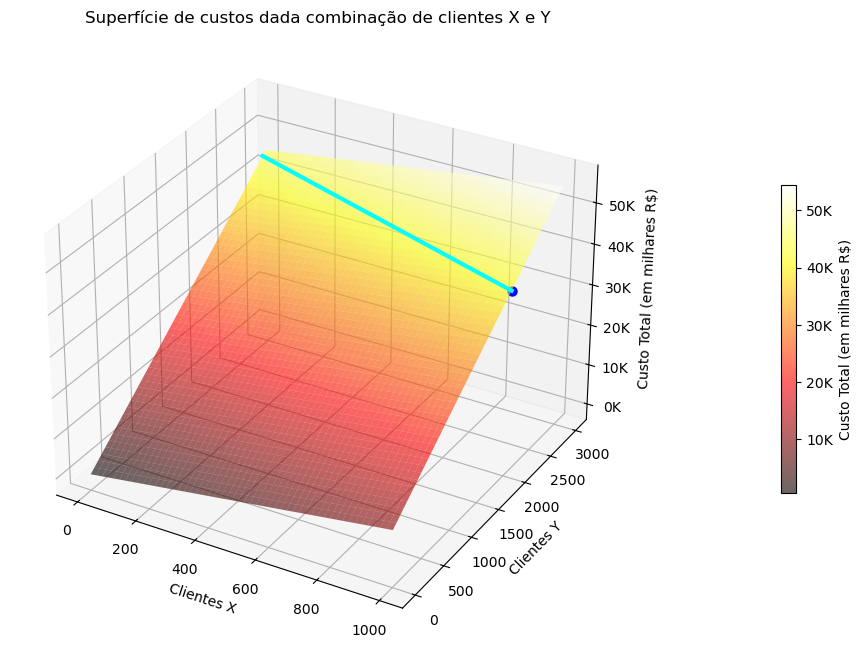

In [165]:
from matplotlib import ticker 

segmentacao_x = np.linspace( 0, 1000, 1000 )
segmentacao_y = np.linspace( 0, 3000, 3000)

xx, yy = np.meshgrid( segmentacao_x, segmentacao_y )

def custo_total( xx, yy ): 
    return xx*10 + yy*15

area_custo_total = custo_total( xx, yy )

#### Visualização 3D - Todas as combinações possíveis e seu respectivo custo ####
fig = pp.figure( figsize = ( 20, 8 ) )
ax = fig.add_subplot( 1, 1, 1, projection = '3d' )

# Plot da superfície (com alpha menor para enxergar a linha melhor)
superficie = ax.plot_surface( xx, yy, area_custo_total, alpha = 0.6, cmap = pp.cm.hot, linewidth=0 )

# Formatando os eixos 
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K')
ax.set_xlabel( 'Clientes X' )
ax.set_ylabel( 'Clientes Y' )
ax.set_zlabel('Custo Total (em milhares R$)')
ax.zaxis.set_major_formatter(formatter)

ax.set_title(  'Superfície de custos dada combinação de clientes X e Y'  )

cbar = pp.colorbar( superficie, label = 'Custo Total (em milhares R$)', shrink=0.5, pad=0.1)
cbar.ax.yaxis.set_major_formatter(formatter)

#### Criando a linha ótima ####

# Para cadas cliente X testado, quantos do Y devemos testar para que atinja 500 clientes convertidos
def clientes_y_necessarios(x_linha):
    y_linha = ((500 - x_linha * 0.15) / 0.17)
    return y_linha
    
x_linha = np.linspace( 0, 1000, 1000 )
y_linha = clientes_y_necessarios(x_linha)
z_linha = custo_total(x_linha, y_linha)

# PLOT DA LINHA DE RESTRIÇÃO (500 clientes convertidos)
ax.plot(x_linha, y_linha, z_linha, color='cyan', lw=3, label='Combinação para converter 500 clientes', zorder=10)

# Encontrando o ponto ideal (Mínimo)
idx_min = np.argmin(z_linha)
ax.scatter(x_linha[idx_min], y_linha[idx_min], z_linha[idx_min], color='blue', zorder=100, lw=3);

In [170]:
x_linha[idx_min], y_linha[idx_min], z_linha[idx_min]

(np.float64(1000.0),
 np.float64(2058.8235294117644),
 np.float64(40882.35294117646))

# Alternativa

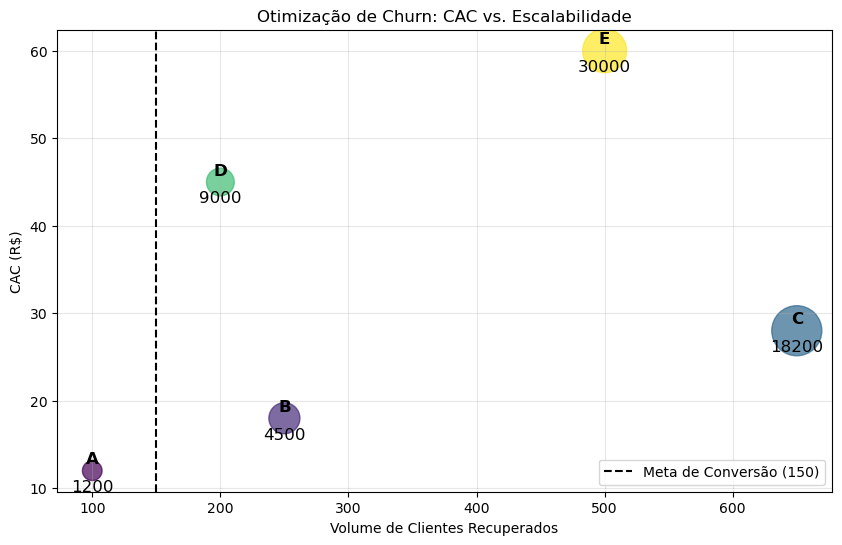

In [191]:
import matplotlib.pyplot as plt

# Dados das campanhas
campanhas = ['A', 'B', 'C', 'D', 'E']
cac = [12, 18, 28, 45, 60]
volume = [100, 250, 650, 200, 500]
custo_total = [cac[i]*volume[i] for i, txt in enumerate(campanhas)]

plt.figure(figsize=(10, 6))
plt.scatter(volume, cac, s=[v*2 for v in volume], c=cac, cmap='viridis', alpha=0.7)

# Anotações para as campanhas
for i, txt in enumerate(campanhas):
    # Nome da campanha: 5 pontos acima do marcador
    plt.annotate(txt, (volume[i], cac[i]), 
                 xytext=(0, 5), textcoords='offset points', 
                 ha='center', weight='bold', size=12)
    
    # Valor (Volume * CAC): 15 pontos abaixo do marcador
    plt.annotate(f"{custo_total[i]}", (volume[i], cac[i]), 
                 xytext=(0, -15), textcoords='offset points', 
                 ha='center', size=12)

# Linha de Meta
plt.axvline(x=150, color='black', linestyle='--', label='Meta de Conversão (150)')

plt.title('Otimização de Churn: CAC vs. Escalabilidade')
plt.xlabel('Volume de Clientes Recuperados')
plt.ylabel('CAC (R$)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [201]:
# Transcrição dos dados da tabela
campanha = ["A", "B", "C", "D"]
cac_inicial = [100, 150, 200, 300]
conversao = [0.01, 0.03, 0.50, 0.10]  # Representado em valores decimais (1%, 3%, 100%, 10%)
cac_calculado = [100, 400, 5000, 1000]
target = [100, 100, 100, 100]
clientes_necessarios = [10000, 3333, 100, 1000]
custo_total = [10000, 40000, 1000000, 100000]

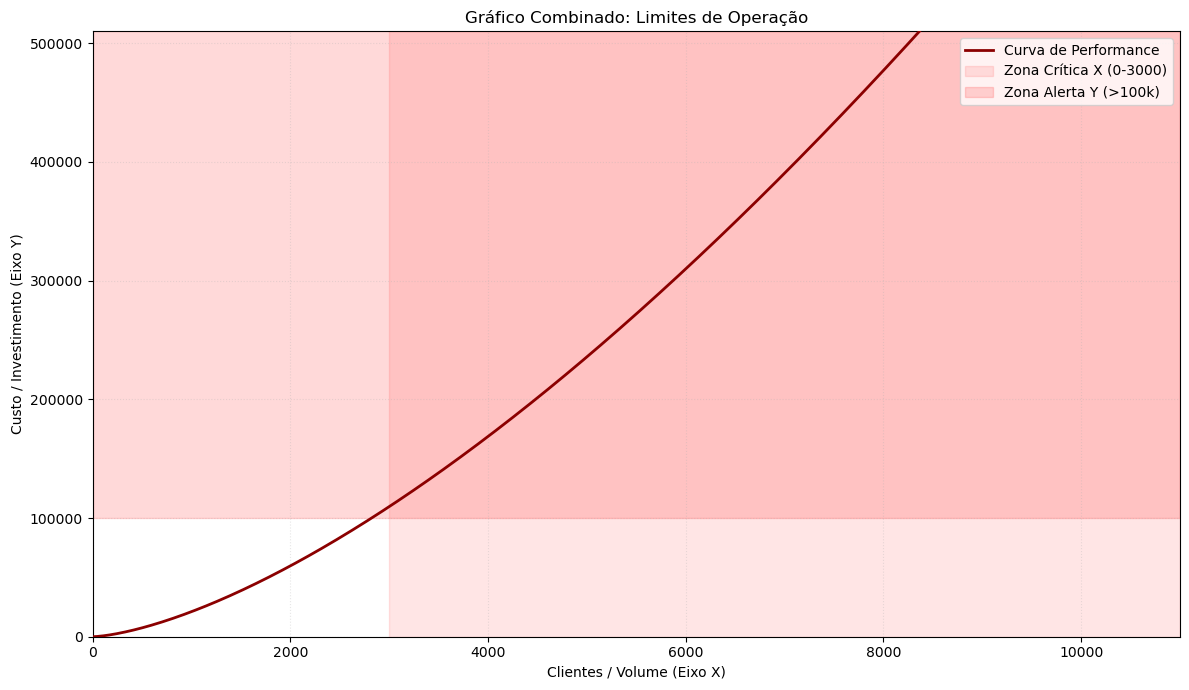

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Configuração dos limites solicitados
x_max = 11000
y_max = 510000
limite_x = 3000
limite_y = 100000

# Criando dados para a linha (exemplo hipotético baseado nos seus dados)
x = np.linspace(0, x_max, 500)
y = (x**1.5) / 1.5  # Uma curva que atravessa ambos os limites

plt.figure(figsize=(12, 7))

# 1. Plotagem da linha principal
plt.plot(x, y, color='darkred', linewidth=2, label='Curva de Performance', zorder=3)

# 2. Área Vermelha Clara Vertical (Eixo X: 0 a 3000)
# Usamos alpha baixo (0.1) para não carregar o visual
plt.axvspan(limite_x, x_max, color='red', alpha=0.1, label='Zona Crítica X (0-3000)')

# 3. Área Vermelha Clara Horizontal (Eixo Y: 100.000 a 1.100.000)
plt.axhspan(limite_y, y_max, color='red', alpha=0.15, label='Zona Alerta Y (>100k)')

# Configurações de exibição
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.title("Gráfico Combinado: Limites de Operação")
plt.xlabel("Clientes / Volume (Eixo X)")
plt.ylabel("Custo / Investimento (Eixo Y)")

# Formatação para evitar notação científica (ex: 1e6) e facilitar leitura
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True, linestyle=':', alpha=0.3)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()